**2. Employment Status among the Rwandan youth aged 0-25 years**

This analysis part will undergo two main sections that are very important:
1. Overall youth population status in Rwanda
2. Key indicators that show the employment status in Rwanda youth

##### Section 1: Overall

In [23]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import folium
import json
import geopandas as gpd
from branca.colormap import LinearColormap
from datetime import datetime
import pickle

In [5]:
rwanda_geojson_path = 'gadm41_RWA_2.json'
rwanda_gdf = gpd.read_file(rwanda_geojson_path)
rwanda_gdf.head()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,RWA.1.1_1,RWA,Rwanda,RWA.1_1,Amajyaruguru,NA,Burera,NA,NA,District,District,44,RW.NO.BR,"MULTIPOLYGON (((29.8039 -1.5659, 29.7972 -1.56..."
1,RWA.1.2_1,RWA,Rwanda,RWA.1_1,Amajyaruguru,NA,Gakenke,NA,NA,District,District,42,RW.NO.GK,"MULTIPOLYGON (((29.8649 -1.8635, 29.8626 -1.86..."
2,RWA.1.3_1,RWA,Rwanda,RWA.1_1,Amajyaruguru,NA,Gicumbi,NA,NA,District,District,45,RW.NO.GC,"MULTIPOLYGON (((30.2717 -1.8195, 30.2756 -1.83..."
3,RWA.1.4_1,RWA,Rwanda,RWA.1_1,Amajyaruguru,NA,Musanze,NA,NA,District,District,43,RW.NO.MS,"MULTIPOLYGON (((29.6648 -1.5964, 29.6565 -1.59..."
4,RWA.1.5_1,RWA,Rwanda,RWA.1_1,Amajyaruguru,NA,Rulindo,NA,NA,District,District,41,RW.NO.RL,"MULTIPOLYGON (((29.9796 -1.8895, 29.9781 -1.89..."


In [6]:
data = pd.read_excel('district youth population 16-25.xlsx')
data.head()

,NAME_2,16-20year,21-25year,Tot_rate_16-25year,Total Population
0,Nyarugenge,13.3,12.3,25.6,325228.2
1,Gasabo,12.0,12.3,24.3,645250.5
2,Kicukiro,11.8,12.8,24.6,347484.8
3,Nyanza,10.1,8.1,18.2,344520.7
4,Gisagara,10.2,7.8,18.0,346184.4


In [7]:
# Merge the data with GeoDataFrame
merged_data = rwanda_gdf.merge(data, on='NAME_2', how='left')
merged_data.head()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,16-20year,21-25year,Tot_rate_16-25year,Total Population
0,RWA.1.1_1,RWA,Rwanda,RWA.1_1,Amajyaruguru,NA,Burera,NA,NA,District,District,44,RW.NO.BR,"MULTIPOLYGON (((29.8039 -1.5659, 29.7972 -1.56...",10.3,8.2,18.5,351526.0
1,RWA.1.2_1,RWA,Rwanda,RWA.1_1,Amajyaruguru,NA,Gakenke,NA,NA,District,District,42,RW.NO.GK,"MULTIPOLYGON (((29.8649 -1.8635, 29.8626 -1.86...",10.2,8.5,18.7,353584.8
2,RWA.1.3_1,RWA,Rwanda,RWA.1_1,Amajyaruguru,NA,Gicumbi,NA,NA,District,District,45,RW.NO.GC,"MULTIPOLYGON (((30.2717 -1.8195, 30.2756 -1.83...",12.3,8.2,20.5,394449.9
3,RWA.1.4_1,RWA,Rwanda,RWA.1_1,Amajyaruguru,NA,Musanze,NA,NA,District,District,43,RW.NO.MS,"MULTIPOLYGON (((29.6648 -1.5964, 29.6565 -1.59...",11.6,9.2,20.8,394394.7
4,RWA.1.5_1,RWA,Rwanda,RWA.1_1,Amajyaruguru,NA,Rulindo,NA,NA,District,District,41,RW.NO.RL,"MULTIPOLYGON (((29.9796 -1.8895, 29.9781 -1.89...",10.2,8.6,18.8,308647.7


In [8]:
# Initialize Folium map centered on Rwanda
rwanda_map = folium.Map(location=[-1.9403, 29.8739], zoom_start=8)

# Create a colormap for the Tot_rate_16-25year field
colormap = LinearColormap(
    colors=['#fee5d9', '#fcae91', '#fb6a4a', '#de2d26', '#a50f15'],
    vmin=merged_data['Tot_rate_16-25year'].min(),
    vmax=merged_data['Tot_rate_16-25year'].max()
)
#colormap.caption = 'Youth Employment Rate by District (%)'
#colormap.add_to(rwanda_map)
# Add a static title to the map
title_html = '''
     <h3 align="center" style="font-size:20px"><b>Youth Population Rate (16-25 years) by District in Rwanda</b></h3>
     '''
rwanda_map.get_root().html.add_child(folium.Element(title_html))
# Add choropleth layer to visualize Tot_rate_16-25year
folium.Choropleth(
    geo_data=merged_data.__geo_interface__,
    name='Youth Population Aged 16-25year by Distr',
    data=merged_data,
    columns=['NAME_2', 'Tot_rate_16-25year'],
    key_on='feature.properties.NAME_2',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Youth Population Rate by District (%)',
    highlight=True
).add_to(rwanda_map)

# Add tooltips with district information
folium.GeoJson(
    merged_data,
    style_function=lambda x: {'fillColor': '#ffffff', 'color': '#000000', 'fillOpacity': 0.1, 'weight': 0.1},
    control=False,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['NAME_2', 'Tot_rate_16-25year', 'Total Population'],
        aliases=['District:', 'Youth Pop Rate (%):', 'Total Population:'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
    )
).add_to(rwanda_map)

# Display or save the map
rwanda_map

#### Employment to population ratio, ages 15-24,

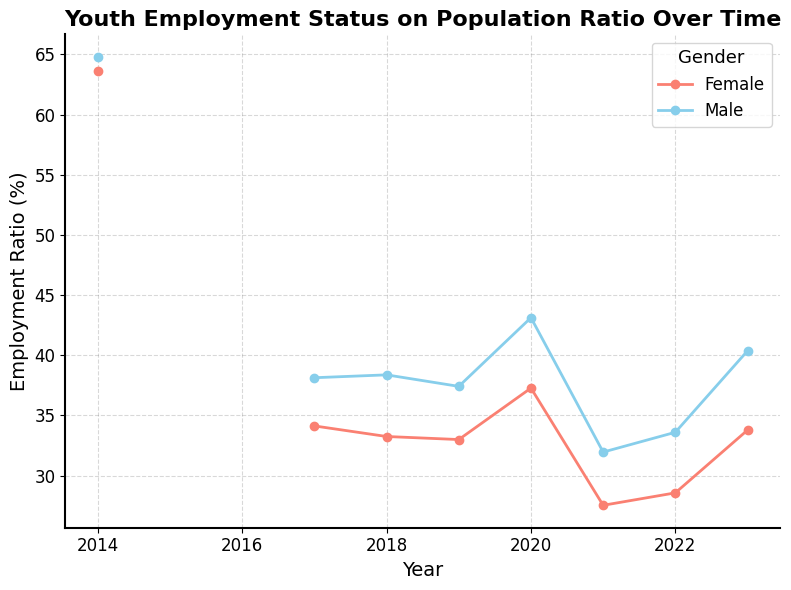

In [10]:
# Load the data
employment_pop_ratio = pd.read_excel("Employment to population ratio(ages 15-24).xlsx")
employment_pop_ratio = employment_pop_ratio.set_index("Year").T.reset_index()
employment_pop_ratio.columns = ["Year", "Total", "Male", "Female"]


# Initialize the figure and set its size
plt.figure(figsize=(8, 6))

# Plot Female employment line
plt.plot(employment_pop_ratio["Year"], employment_pop_ratio["Female"], 
         marker="o", color="salmon", linewidth=2, markersize=6, label="Female")

# Plot Male employment line
plt.plot(employment_pop_ratio["Year"], employment_pop_ratio["Male"], 
         marker="o", color="skyblue", linewidth=2, markersize=6, label="Male")



# Set title and labels
plt.title("Youth Employment Status on Population Ratio Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Employment Ratio (%)", fontsize=14)

# Customize x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, linestyle="--", color="gray", alpha=0.3)  # light grid for readability

# Add legend with title and adjust layout for clarity
plt.legend(title="Gender", fontsize=12, title_fontsize="13")

# Add professional styling
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_linewidth(1.5)
plt.gca().spines["bottom"].set_linewidth(1.5)

# Show the plot
plt.tight_layout()
plt.show()

#### Section 1

A) Distribution of Usually employed youth

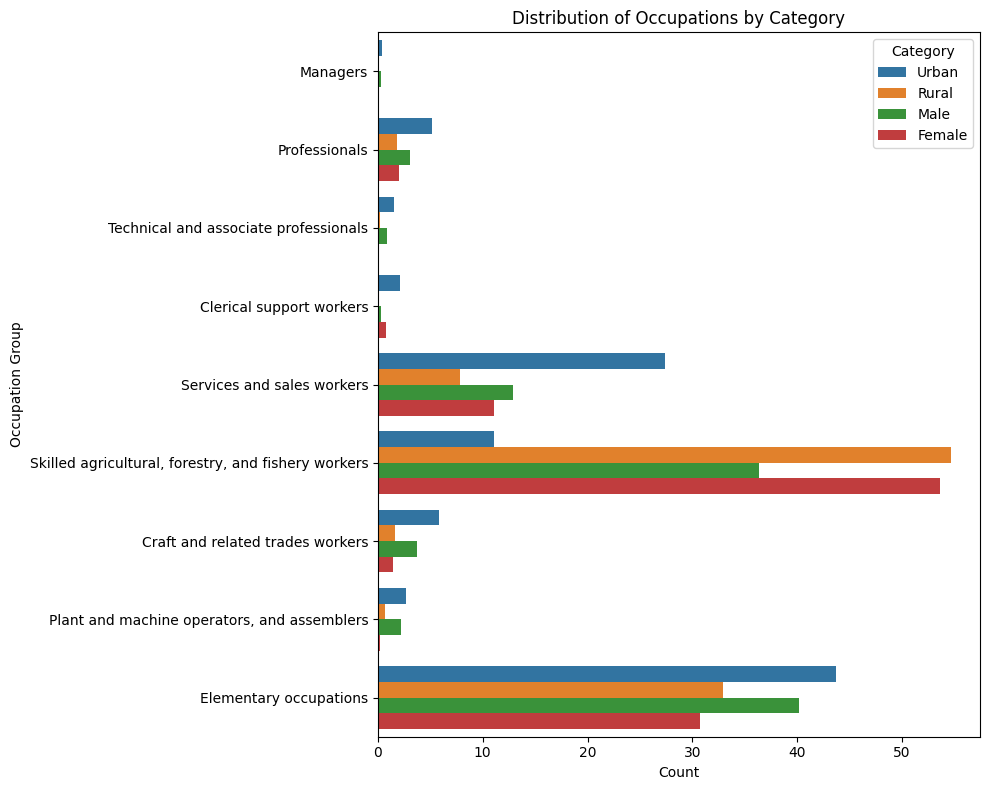

In [13]:
# Load the data
employment_by_occupation_category = pd.read_excel("employed youth (16-30) by occupation group of main usual jobs.xlsx")

# Melt the dataframe for easier plotting
melted_df = employment_by_occupation_category.melt(
    id_vars=['Occupation group of main usual job (ISCO 1 digit)'], 
    value_vars=['Urban', 'Rural', 'Male', 'Female'], 
    var_name='Category', value_name='Count'
)

# Create a vertical bar plot to visualize the data
plt.figure(figsize=(10, 8))
sns.barplot(
    data=melted_df, 
    y='Occupation group of main usual job (ISCO 1 digit)', 
    x='Count', 
    hue='Category', 
    orient="h"  # horizontal orientation for bars
)

# Customize plot appearance
plt.title('Distribution of Occupations by Category')
plt.xlabel('Count')
plt.ylabel('Occupation Group')
plt.legend(title='Category')
plt.tight_layout()

# Show the plot
plt.show()

B) Working for wage by economic sector


In [28]:
working_for_wage = pd.read_excel("working for wage by economic sector.xlsx")
working_for_wage

,Institutional sector,Male(16-20),Female(16-20),Male(21-25),Female(21-25)
0,Public,0.3,0.3,1.3,0.9
1,Private,99.6,99.5,98.4,98.7
2,NGO,0.2,0.2,0.2,0.4
3,Others,0.0,0.0,0.1,0.0


In [25]:
# Save the datasets in pickle files
with open('merged_data.pkl', 'wb') as f:
    pickle.dump(merged_data, f)

with open('employment_pop_ratio.pkl', 'wb') as f:
    pickle.dump(employment_pop_ratio, f)

with open('employment_by_occupation_category.pkl', 'wb') as f:
    pickle.dump(employment_by_occupation_category, f)

with open('melted_df.pkl', 'wb') as f:
    pickle.dump(melted_df, f)